# Milestone3_AQQC_QualityControl_AQObservations

In [1]:

%pip install pandas
import pandas as pd

%pip install pecos
import pecos

%pip install seaborn
import seaborn as sns

from pandas import json_normalize

%pip install matplotlib
import matplotlib.pyplot as plt

%pip install datetime
from datetime import datetime, date, time, timezone

%pip install numpy
import numpy as np

%pip install scipy
from scipy import stats

%pip install csv
import csv

%pip install re
import re   
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colors import rgb2hex



Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
ERROR: Could not find a version that satisfies the requirement csv
ERROR: No matching distribution found for csv
Note: you may need to restart the kernel to use updated packages.
ERROR: Could not find a version that satisfies the requirement re
ERROR: No matching distribution found for re
Note: you may need to restart the kernel to use updated packages.


In [2]:

dashboard_content = {}  # Initialize the dashboard content dictionary

In [3]:
def Milestone2_Get_OpenAQ_Dataset_Wrangling_utc_index(OpenAQ_Dataset_ImportAPI):

   format = '%Y-%m-%d %H:%M:%S'
    
   OpenAQ_Dataset_ImportAPI['date.utc'] = pd.to_datetime(OpenAQ_Dataset_ImportAPI['date.utc'], format=format).dt.tz_localize(None)

  # OpenAQ_Dataset_ImportAPI = OpenAQ_Dataset_ImportAPI[OpenAQ_Dataset_ImportAPI.value != -999.00]

   Formating = pd.DatetimeIndex(OpenAQ_Dataset_ImportAPI['date.utc'])
  
   OpenAQ_Dataset_ImportAPI = OpenAQ_Dataset_ImportAPI.set_index(Formating)

   return OpenAQ_Dataset_ImportAPI

In [4]:
def Milestone2_Remove_neg_attribute(OpenAQ_Dataset_ImportAPI):
    
    OpenAQ_Dataset_ImportAPI = OpenAQ_Dataset_ImportAPI[OpenAQ_Dataset_ImportAPI.value != -999.00]

    return OpenAQ_Dataset_ImportAPI

In [5]:
def Milestone2_Remove_negative_attribute(OpenAQ_Dataset_ImportAPI):
    
    OpenAQ_Dataset_ImportAPI = OpenAQ_Dataset_ImportAPI[OpenAQ_Dataset_ImportAPI.value >= 0]

    return OpenAQ_Dataset_ImportAPI

In [6]:
def Milestone2_OpenAQ_Dataset_VisualAnalytics_Histogram_Unique(df4, OpenAQStationunique, OpenAQDataset_VisualAnalytics, OpenAQDataset_VisualAnalytics_iteration):
   
   OpenAQ_Dataset_Graph_df = [] 
    
   for OpenAQunique in OpenAQStationunique:
      
      OpenAQ_Dataset_Graph = []  
      
      OpenAQ_Dataset_Graph.append(OpenAQunique)
      
      OpenAQAPIdatasetunique = df4[df4['location'] == OpenAQunique]
      
      OpenAQStationcompletegetunique = Milestone2_OpenAQStation_remove_NonAlpha(OpenAQunique)
            
      OpenAQDataset_measureStationVisualAnalytics = OpenAQDataset_VisualAnalytics + " Station OpenAQ " + OpenAQStationcompletegetunique
      
      OpenAQDataset_VisualGraphiteration = OpenAQDataset_VisualAnalytics_iteration + " Station OpenAQ " + OpenAQStationcompletegetunique
            
      OpenAQgraph = Milestone2_OpenAQ_VisualAnalytics_parameters(OpenAQAPIdatasetunique, OpenAQunique, OpenAQDataset_measureStationVisualAnalytics, OpenAQDataset_VisualGraphiteration)
      
      OpenAQ_Dataset_Graph.append(OpenAQgraph)

      OpenAQ_Dataset_Graph_df.append(OpenAQ_Dataset_Graph)

   return OpenAQ_Dataset_Graph_df


In [7]:

def Milestone2_OpenAQ_VisualAnalytics_parameters(df4,OpenAQselectunique, OpenAQDataset_VisualAnalytics, OpenAQDataset_VisualAnalytics_iteration):
        
        
    OpenAQparameterunique = df4['parameter'].unique()
    
    OpenAQ_Dataset_uniqueGraph = []  
    
    
    for OpenAQStationparameter in OpenAQparameterunique:
        
       OpenAQ_Dataset_Graph = []  
       
       OpenAQ_Dataset_Graph.append(OpenAQselectunique)
       
      
       OpenAQdfunique = df4[df4['parameter'] == OpenAQStationparameter]
       
       OpenAQDataset_VisualAnalyticsplt = OpenAQDataset_VisualAnalytics_iteration + " " + OpenAQStationparameter
       
       OpenAQDataset_VisualAnalytic = OpenAQDataset_VisualAnalytics + " " + OpenAQStationparameter
       
       yaxishistogram = "Amount of Measurements " + OpenAQStationparameter
              
       OpenAQ_Dataset_df = Milestone2_OpenAQ_Dataset_VisualAnalytics_Histogram(OpenAQdfunique, OpenAQStationparameter, OpenAQDataset_VisualAnalyticsplt, title=OpenAQDataset_VisualAnalytic, xlabel='Value', ylabel=yaxishistogram, dpi=100)
      
       OpenAQ_Dataset_Graph.append(OpenAQ_Dataset_df)
      
       yaxis = "OpenAQ Measurements " + OpenAQStationparameter
       
       OpenAQ_Dataset = Milestone2_Import_OpenAQ_CSV_plot(OpenAQdfunique, OpenAQdfunique.index, OpenAQdfunique['value'], OpenAQStationparameter, OpenAQDataset_VisualAnalyticsplt, title=OpenAQDataset_VisualAnalytic, xlabel='Date utc timestamp', ylabel=yaxis, dpi=100)

       OpenAQ_Dataset_Graph.append(OpenAQ_Dataset)

       OpenAQ_Dataset_Graph.append(OpenAQStationparameter)

       OpenAQ_Dataset_uniqueGraph.append(OpenAQ_Dataset_Graph) 


    OpenAQ_Dataset_uniqueGraph.append(OpenAQparameterunique)

    return OpenAQ_Dataset_uniqueGraph

In [8]:
def Milestone2_OpenAQStation_remove_NonAlpha(OpenAQStationunique):
    
   OpenAQStationformatunique = re.sub(r'\W+', '', str(OpenAQStationunique))
  
   print(OpenAQStationformatunique)
   
   return OpenAQStationformatunique

In [9]:
def Milestone2_Import_OpenAQ_CSV_plot_Unique(df4, OpenAQStationunique, xaxis, yaxis, parameter, OpenAQDataset_VisualAnalytics, xlabel='Value', ylabel='Amount of Measurements', dpi=100):
   
   for OpenAQunique in OpenAQStationunique:
        
      print(OpenAQunique) 
       
      OpenAQAPIdatasetunique = df4[df4['location'] == OpenAQunique]
      
      Milestone2_Import_OpenAQ_CSV_plot(OpenAQAPIdataset, xaxis, yaxis, parameter, OpenAQ_Dataset, title=OpenAQDataset_VisualAnalytics, xlabel='Value', ylabel='Amount of Measurements', dpi=100)


In [10]:
def Milestone2_OpenAQ_Dataset_VisualAnalytics_Histogram(df4, parameter, OpenAQDataset_VisualAnalytics_iteration, title="", xlabel='Value', ylabel='Amount of Measurements', dpi=100):
    
# Step Create a Histogram of the OpenAQ Dataset for parameter
   
   print("Histogram of OpenAQ Dataset from OpenAQ API download") 
    
   plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
   
   plt.hist(df4['value'], bins="auto")
            
           # bins=np.arange(1,df4['value'].max()))
   
   OpenAQ_Dataset =  OpenAQDataset_VisualAnalytics_iteration + " Histogram" + ".png"
      
   plt.savefig(OpenAQ_Dataset)
   
   plt.show()

   return OpenAQ_Dataset

In [11]:
def Milestone2_Import_OpenAQ_CSV_plot(df4, xaxis, yaxis, parameter, OpenAQDataset_VisualAnalytics_iteration,  title="", xlabel='Date', ylabel='Value', dpi=100):
    
   print("OpenAQ Dataset LinePlot")
     
   plt.figure(figsize=(16,5), dpi=dpi)
   plt.plot(xaxis, yaxis, color='tab:blue')
   plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
       
   OpenAQ_Dataset = OpenAQDataset_VisualAnalytics_iteration + " Line Graph" + ".png"
        
   plt.savefig(OpenAQ_Dataset)
 
   plt.show()

   return OpenAQ_Dataset


In [12]:
def Milestone1_Get_Parameter(DatasetOpenAQ, Parameter):
       
   DatasetOpenAQ = DatasetOpenAQ[DatasetOpenAQ.parameter==Parameter]
  
   return DatasetOpenAQ

In [13]:
def Milestone3_Get_Imported_OpenAQ_Dataset_parameter_unique_Test(OpenAQDatasetparameter, OpenAQ_Dataset_Graph_df, TestId, Test_Analysis):
    
   OpenAQStationparameter = OpenAQDatasetparameter['parameter'].unique()


   for OpenAQStation in OpenAQ_Dataset_Graph_df:
       
      print(OpenAQStation[1][1])    
      
      

   if(len(OpenAQStationparameter) == 0):
     parameter = OpenAQStationparameter[0]
  
   else:
     parameter = Parameter_Default  
    
   return parameter

In [14]:
def Milestone3_Get_Imported_OpenAQ_Dataset_Test(OpenAQ_Dataset_OpenAQCSV_Download_Test, TestId, Test_Analysis):
    
   Milestone3_Get_Imported_OpenAQ_Dataset(OpenAQ_Dataset_OpenAQCSV_Download_Test)

In [15]:
def Milestone3_Get_VisualAnalytics(OpenAQDataset, OpenAQStation):
     
    OpenAQdfDataset = []
    
    for OpenAQdatasetGraph in OpenAQDataset:
      
       if(OpenAQdatasetGraph[0] == OpenAQStation): 

           OpenAQdfDataset = OpenAQdatasetGraph
           
    return OpenAQdfDataset       
           

In [16]:
def Milestone3_Pecos_Complete_QC_QualityControl_OpenAQStation(OpenAQStation, OpenAQDataset_VisualAnalytics_iteration, OpenAQStationunique, OpenAQDataset, yaml_include):
    
   iteration = 0 
    
   OpenAQSearchCriteria = ""
    
   for OpenAQunique in OpenAQStationunique:
        
      print(OpenAQunique) 
   
      OpenAQSearchCriteria = OpenAQSearchCriteria + ""
      
      OpenAQAPIdatasetunique = OpenAQStation[OpenAQStation['location'] == OpenAQunique]
      
      OpenAQCompleteDataset = Milestone3_Get_VisualAnalytics(OpenAQDataset, OpenAQunique)
      
      OpenAQStationcompleteunique = Milestone2_OpenAQStation_remove_NonAlpha(OpenAQunique)
      
      OpenAQDataset_VisualAnalytics_iteration_unique = OpenAQDataset_VisualAnalytics_iteration + " " + OpenAQStationcompleteunique 
      
      Milestone3_Pecos_Quality_Control_parameters(OpenAQStation[OpenAQStation['location']==OpenAQunique], OpenAQDataset_VisualAnalytics_iteration_unique, OpenAQDataset[iteration][1], OpenAQSearchCriteria, yaml_include, OpenAQunique)

      iteration = iteration + 1


In [17]:
def Milestone3_Pecos_Quality_Control_parameters(OpenAQStation, OpenAQDataset_VisualAnalytics_iteration, OpenAQDataset, OpenAQSearchCriteria, yaml_include, OpenAQunique):
    
    OpenAQparameterunique = OpenAQStation['parameter'].unique()
    
    iteration = 0
    
    for OpenAQStationparameter in OpenAQparameterunique:
        
       OpenAQSearchCriteria1 = OpenAQSearchCriteria + "" + OpenAQStationparameter
        
       OpenAQDatasetStation = Milestone1_Get_Parameter(OpenAQStation, OpenAQStationparameter)

       OpenAQDataset_VisualAnalytics_iteration = OpenAQDataset_VisualAnalytics_iteration + " " + OpenAQStationparameter 

       if(yaml_include == 1):
   
           (DA, QCI) =Milestone3_Pecos_Complete_QualityControl_SearchCriteriaOne_OpenAQStation(OpenAQDatasetStation, OpenAQDataset_VisualAnalytics_iteration, OpenAQDataset[iteration], OpenAQSearchCriteria1)
           dashboard_cell = generate_dashboard_cell(DA, QCI)
           dashboard_content[(OpenAQunique, OpenAQStationparameter)] = dashboard_cell
           
       else:    
 
           (DA, QCI) = Milestone3_Pecos_Complete_QualityControl_One_OpenAQStation(OpenAQDatasetStation, OpenAQDataset_VisualAnalytics_iteration, OpenAQDataset[iteration]) 
           dashboard_cell = generate_dashboard_cell(DA, QCI)
           dashboard_content[(OpenAQunique, OpenAQStationparameter)] = dashboard_cell
          
       iteration = iteration + 1        


In [18]:
def Milestone3_Pecos_Complete_QualityControl_One_OpenAQStation(OpenAQStation, OpenAQDataset_VisualAnalytics_iteration, OpenAQDataset):

   # Step 2 Initialize logger and Create a Pecos PerformanceMonitoring data object
   pecos.logger.initialize()
   
   pm = pecos.monitoring.PerformanceMonitoring()

   print()

   # Step 3 Append Dataframe to Pecos PerformanceMonitoring data object
   pm.add_dataframe(OpenAQStation)

   # Step 4 Check the expected frequency of the timestamp
   #
   # 1 Edit timestep when 900 is 15 mins     

   Timestep = 900 # Edit
   
   pm.check_timestamp(Timestep)

   print("*****")

   print("Criteria 1 : Timestep ")
   
   print(Timestep)
   
   # Step 5 Check for missing data
   
   
   no_missing_values = OpenAQStation.value.isna().sum()
   data_availability = (len(OpenAQStation.index) - no_missing_values) / len(OpenAQStation.index)

   print("data availabilty: ", no_missing_values, data_availability)

   
   if(QC_CheckDatasetComplete == 1):

       pm.check_missing()
   
# Step 6 Choose acceptable value range and Check data for expected ranges
#
# Parameters
#  
#  1 Lower bound of values
#  2 Higher Bound of values
#  3 Data column (default = None, which indicates that all columns are used)
#  4 Minimum number of consecutive failures for reporting (default = 1)le increment from measurements of 15 minutes and check for abrupt changes between consecutive time steps
#
#   e.g pm.check_range([0, 200], key='value')  
#         pm.check_range([1, 2], key='3',4)
#
# Results: Any value outside of the range is an outlier

   LowerBound = None # Edit 
   
   HigherBound = 400 # Edit

   pm.check_range([LowerBound, HigherBound], key='value')
 
   print("*****")
   
   print("Criteria 2 : Lower Bound and Higher Bound ")
  
   print("Lower Bound ")
   
   print(LowerBound)   
   
   print("Higher Bound")
   
   print(HigherBound)
   
# Step 7 Choose the min amount that is acceptable to change from measurements 
#
# Parameters:
#
#    1 Lower bound to decrease by
#    2 Upper bound to increase by
#    3 Size of the moving window used to compute the difference between the minimum and maximum
#    4 Data column (default = None, which indicates that all columns are used)
#    5 Flag indicating if the test should only check for positive delta (the min occurs before the max) or negative delta (the max occurs before the min) (default = False)
#    6 Minimum number of consecutive failures for reporting (default = 1)
#
#  e.g. pm.check_delta([Miniumn Decrease, Min Increase], window=3600, 'value')
#      included parametes 1-6: pm.check_delta([1, 2], window=3, key='4', 5, 6)
#
#  Results: When over min decrease or increase it is an outlier
 
   print("*****")
  
   print("Criteria 3 : Stagnant Measurements ")
  
   DeltaLowerBound = None # Edit
   
   DeltaHigherBound = 10 # Edit
   
   DeltaTimeSchedule = 3600 # Edit
   
   pm.check_delta([DeltaLowerBound, DeltaHigherBound], window=DeltaTimeSchedule, key='value')

   print(" Measurement that increase by " )
   
   print(DeltaHigherBound )
   
   print("in Time Schedule")
   
   print(DeltaTimeSchedule)

   print("Delta Lower Bound")

   print(DeltaLowerBound)

# Step 8 Choose acceptable increment on measurements 
#
# Parameters
#  
#  1 Lower bound to de increment by
#  2 Higher Bound to increment by
#  3 Data column (default = None, which indicates that all columns are used)
#  4 Increment used for difference calculation (default = 1 timestamp)
#  5 Flag indicating if the absolute value of the increment is used in the test (default = True)
#  6 Minimum number of consecutive failures for reporting (default = 1)
#
# e.g pm.check_increment([None, 20], 'value') 
#    included parametes 1- 4:  pm.check_increment([1, 2], key='3', 4, 5, 6) 
#
# Results: Any measurement that has a larger increment or de increment by choosen value is an outlier

   print("*****")
 
   print("Criteria 4 : Maximum Increment of Measurements ")

   Increment_Increase = 20 # Edit
   
   Increment_Decrease = None # Edit
  
   pm.check_increment([Increment_Decrease, Increment_Increase], key='value') 

   print("Increment Increase")
   
   print(Increment_Increase)

   print("Increment Decrease")
   
   print(Increment_Decrease)

   print("*****")

   print("Criteria 5: Outlier")
   
   print("UpperBound")

   UpperBoundOutlier = 3 # Edit

   LowerBoundOutlier = None # Edit
   
   print(UpperBoundOutlier)
   
   print("Time Schedule")
     
   TimeSchedule = 12*3600 # Edit
   
   print(TimeSchedule)
   
   pm.check_outlier([LowerBoundOutlier, UpperBoundOutlier], window=TimeSchedule, key='value')

   # Step 9 Compute the quality control index for value
   mask = pm.mask[['value']]
       
   QCI = pecos.metrics.qci(mask)

   print("*****")

   print("OpenAQ Dataset Results ")

   print("Mask")
  
   print(pm.mask) 
   
 #  print(pm.cleaned_data[pm.cleaned_data['value'] == 'NaN'])
   
   print("Performance Metrics")

   print(QCI)

   custom = 'custom' + OpenAQDataset_VisualAnalytics_iteration + '.png'

   custom_graphics_graph = '.png' 

   MeasurementOpenAQ = int(OpenAQStation['value'].max())

   print(OpenAQStation['value'].describe())
  
    
   test_results_graphics_OpenAQ = [] 
   
   # Step 10 Generate graphics
   test_results_graphics = pecos.graphics.plot_test_results(pm.df, pm.test_results, filename_root=OpenAQDataset_VisualAnalytics_iteration)
   
   
   
 #  test_results_graphics_OpenAQ.append(test_results_graphics)
   
   test_results_graphics_OpenAQ.append(OpenAQDataset[1])
   
   test_results_graphics_OpenAQ.append(OpenAQDataset[2])

   
   OpenAQStation.plot(y='value', ylim=[0,MeasurementOpenAQ], figsize=(7.0,3.5))
   plt.savefig(custom, format='png', dpi=500)

   print(custom)
 
   test_results_graphics_OpenAQ.append(custom)
   
   print(pm.test_results)
 
 #  OpenAQDataset_VisualAnalytics_iteration = OpenAQDataset_VisualAnalytics_iteration 

   # Step 11 Write test results and report files to test_results.csv and monitoringreport.html

   Report = 'test_results' + OpenAQDataset_VisualAnalytics_iteration  + ' Result' + '.csv' 

   MonitoringReport = 'MonitoringReport' + OpenAQDataset_VisualAnalytics_iteration + '.html'

   pecos.io.write_test_results(pm.test_results,filename=Report)
   pecos.io.write_monitoring_report(pm.df, pm.test_results, test_results_graphics, 
                                 test_results_graphics_OpenAQ, QCI,filename=MonitoringReport)
 
   metricsOpenAQ = Milestone3_Get_OpenAQresults(pm.test_results, pm.df, QCI)   
   
   OpenAQDataset_VisualAnalytics_Results.append(Report)
   
   OpenAQDataset_VisualAnalytics_Results.append(MonitoringReport)
   
 #  OpenAQDataset_VisualAnalytics_Results.append(OpenAQDataset_VisualAnalytics_iteration + 'metrics.csv')
  
  # pecos.io.write_metrics(metricsOpenAQ, OpenAQDataset_VisualAnalytics_iteration + 'metrics.csv') 

   return (data_availability, QCI.value)



In [42]:
def Milestone3_Get_Pecos_QualityControl_SearchCriteria(OpenAQSearchCriteria):
  
   if(yaml_Yes == 1):
     
     %pip install yaml
    
     import yaml 
  
     config_file = OpenAQSearchCriteria + '_config.yml'
     fid = open(config_file, 'r')
     config = yaml.load(fid)
     fid.close()
   else:
     
     config = PecosQC
       
   return config  

In [20]:
def Milestone3_Pecos_Complete_QualityControl_SearchCriteriaOne_OpenAQStation(OpenAQStation, OpenAQDataset_VisualAnalytics_iteration, OpenAQDataset, OpenAQSearchCriteria):

   # Step 2 Initialize logger, Get search criteria and Create a Pecos PerformanceMonitoring data object
   pecos.logger.initialize()
   
   PecosQualityControlSearchCriteria = Milestone3_Get_Pecos_QualityControl_SearchCriteria(OpenAQSearchCriteria)
  
   pm = pecos.monitoring.PerformanceMonitoring()

   # Step 3 Append Dataframe to Pecos PerformanceMonitoring data object
   
      
   time_increment_mode = get_time_increment_mode(OpenAQStation)

   
   OpenAQStation = cleanup_dataframe(OpenAQStation, time_increment_mode)

   pm.add_dataframe(OpenAQStation)

   # Step 4 Check the expected frequency of the timestamp
   #
   # 1 Edit timestep when 900 is 15 mins     

   Timestep = PecosQualityControlSearchCriteria['Criteria1Timestep']['Timestep'] 
   

  
   no_missing_values = OpenAQStation.value.isna().sum()
   data_availability = (len(OpenAQStation.index) - no_missing_values) / len(OpenAQStation.index)

   print("data availabilty: ", no_missing_values, data_availability)

   

   
   # Default 900 # Edit
   
   pm.check_timestamp(Timestep)

   print("*****")

   print("Criteria 1 : Timestep ")
   
   print(Timestep)
   
   # Step 5 Check for missing data
   
   if(QC_CheckDatasetComplete == 1):

       pm.check_missing()
   
# Step 6 Choose acceptable value range and Check data for expected ranges
#
# Parameters
#  
#  1 Lower bound of values
#  2 Higher Bound of values
#  3 Data column (default = None, which indicates that all columns are used)
#  4 Minimum number of consecutive failures for reporting (default = 1)le increment from measurements of 15 minutes and check for abrupt changes between consecutive time steps
#
#   e.g pm.check_range([0, 200], key='value')  
#         pm.check_range([1, 2], key='3',4)
#
# Results: Any value outside of the range is an outlier

   LowerBound =  PecosQualityControlSearchCriteria['Criteria2LowerHigherBound']['LowerBound']
   
   # Defualt None # Edit 
   
   HigherBound =  PecosQualityControlSearchCriteria['Criteria2LowerHigherBound']['HigherBound']
      
   # Default 400 # Edit

   pm.check_range([LowerBound, HigherBound], key='value')
 
   print("*****")
   
   print("Criteria 2 : Lower Bound and Higher Bound ")
  
   print("Lower Bound ")
   
   print(LowerBound)   
   
   print("Higher Bound")
   
   print(HigherBound)
   
# Step 7 Choose the min amount that is acceptable to change from measurements 
#
# Parameters:
#
#    1 Lower bound to decrease by
#    2 Upper bound to increase by
#    3 Size of the moving window used to compute the difference between the minimum and maximum
#    4 Data column (default = None, which indicates that all columns are used)
#    5 Flag indicating if the test should only check for positive delta (the min occurs before the max) or negative delta (the max occurs before the min) (default = False)
#    6 Minimum number of consecutive failures for reporting (default = 1)
#
#  e.g. pm.check_delta([Miniumn Decrease, Min Increase], window=3600, 'value')
#      included parametes 1-6: pm.check_delta([1, 2], window=3, key='4', 5, 6)
#
#  Results: When over min decrease or increase it is an outlier
 
   print("*****")
  
   print("Criteria 3 : Stagnant Measurements ")
  
   DeltaLowerBound =  PecosQualityControlSearchCriteria['Criteria3Stagnant']['min']
   
   
   # Default None # Edit
   
   DeltaHigherBound =  PecosQualityControlSearchCriteria['Criteria3Stagnant']['max']
   
   # Default 10 # Edit
   
   DeltaTimeSchedule =  PecosQualityControlSearchCriteria['Criteria3Stagnant']['TimeSchedule']
   
   # Default 3600 # Edit
      
   MinbeforeMaxandMaxMin = PecosQualityControlSearchCriteria['Criteria3Stagnant']['MinbeforeMaxandMaxMin']
     
   MinConsectiveFailures = PecosQualityControlSearchCriteria['Criteria3Stagnant']['MinConsectiveFailures']  
   
   pm.check_delta([DeltaLowerBound, DeltaHigherBound], window=DeltaTimeSchedule, direction=MinbeforeMaxandMaxMin, min_failures=MinConsectiveFailures, key='value')

   print(" Measurement that increase by " )
   
   print(DeltaHigherBound )
   
   print("in Time Schedule")
   
   print(DeltaTimeSchedule)

   print("Delta Lower Bound")

   print(DeltaLowerBound)

# Step 8 Choose acceptable increment on measurements 
#
# Parameters
#  
#  1 Lower bound to de increment by
#  2 Higher Bound to increment by
#  3 Data column (default = None, which indicates that all columns are used)
#  4 Increment used for difference calculation (default = 1 timestamp)
#  5 Flag indicating if the absolute value of the increment is used in the test (default = True)
#  6 Minimum number of consecutive failures for reporting (default = 1)
#
# e.g pm.check_increment([None, 20], 'value') 
#    included parametes 1- 4:  pm.check_increment([1, 2], key='3', 4, 5, 6) 
#
# Results: Any measurement that has a larger increment or de increment by choosen value is an outlier

   print("*****")
 
   print("Criteria 4 : Maximum Increment of Measurements ")

   Increment_Increase = PecosQualityControlSearchCriteria['Criteria4Increment']['max']
   
   # Default 20 # Edit
   
   Increment_Decrease = PecosQualityControlSearchCriteria['Criteria4Increment']['min']
   
   # Default None # Edit
  
   pm.check_increment([Increment_Decrease, Increment_Increase], key='value') 

   print("Increment Increase")
   
   print(Increment_Increase)

   print("Increment Decrease")
   
   print(Increment_Decrease)

   print("*****")

   print("Criteria 5: Outlier")
   
   print("UpperBound")

   UpperBoundOutlier = PecosQualityControlSearchCriteria['Criteria5Outlier']['UpperBound']
   
   
   # Default 3 # Edit

   LowerBoundOutlier = PecosQualityControlSearchCriteria['Criteria5Outlier']['LowerBound']
  
   
   # None # Edit
   
   print(UpperBoundOutlier)
   
   print("Time Schedule")
     
   TimeSchedule = PecosQualityControlSearchCriteria['Criteria5Outlier']['TimeSchedule']
   
   # Default 12*3600 # Edit
   
   print(TimeSchedule)
   
   pm.check_outlier([LowerBoundOutlier, UpperBoundOutlier], window=TimeSchedule, key='value')

   # Step 9 Compute the quality control index for value
   mask = pm.mask[['value']]
       
   QCI = pecos.metrics.qci(mask)

   print("*****")

   print("OpenAQ Dataset Results ")

   print("Mask")
  
   print(pm.mask) 
   
 #  print(pm.cleaned_data[pm.cleaned_data['value'] == 'NaN'])
   
   print("Performance Metrics")

   print(QCI)

   custom = 'custom' + OpenAQDataset_VisualAnalytics_iteration + '.png'

   custom_graphics_graph = '.png' 

   MeasurementOpenAQ = int(OpenAQStation['value'].max())

   print(OpenAQStation['value'].describe())
  
    
   test_results_graphics_OpenAQ = [] 
   
   # Step 10 Generate graphics
   test_results_graphics = pecos.graphics.plot_test_results(pm.df, pm.test_results, filename_root=OpenAQDataset_VisualAnalytics_iteration)
   
   
   
 #  test_results_graphics_OpenAQ.append(test_results_graphics)
   
   test_results_graphics_OpenAQ.append(OpenAQDataset[1])
   
   test_results_graphics_OpenAQ.append(OpenAQDataset[2])

   
   OpenAQStation.plot(y='value', ylim=[0,MeasurementOpenAQ], figsize=(7.0,3.5))
   plt.savefig(custom, format='png', dpi=500)

   print(custom)
 
   test_results_graphics_OpenAQ.append(custom)
   
   print(pm.test_results)
 
 #  OpenAQDataset_VisualAnalytics_iteration = OpenAQDataset_VisualAnalytics_iteration 

   # Step 11 Write test results and report files to test_results.csv and monitoringreport.html

   Report = 'test_results' + OpenAQDataset_VisualAnalytics_iteration  + ' Result' + '.csv' 

   MonitoringReport = 'MonitoringReport' + OpenAQDataset_VisualAnalytics_iteration + '.html'

   pecos.io.write_test_results(pm.test_results,filename=Report)
   pecos.io.write_monitoring_report(pm.df, pm.test_results, test_results_graphics, 
                                 test_results_graphics_OpenAQ, QCI,filename=MonitoringReport)
 
   metricsOpenAQ = Milestone3_Get_OpenAQresults(pm.test_results, pm.df, QCI)   
   
   OpenAQDataset_VisualAnalytics_Results.append(Report)
   
   OpenAQDataset_VisualAnalytics_Results.append(MonitoringReport)
   
 #  OpenAQDataset_VisualAnalytics_Results.append(OpenAQDataset_VisualAnalytics_iteration + 'metrics.csv')
  
  # pecos.io.write_metrics(metricsOpenAQ, OpenAQDataset_VisualAnalytics_iteration + 'metrics.csv') 

   return (data_availability, QCI.value)



In [21]:
def create_pecos_dashboard(parameter_list, location_list, Dashboard):
    footnote = "DA = Data availability <br>QCI = Quality control index"

    for location in location_list:
        for parameter in parameter_list:
            if (location, parameter) not in dashboard_content:
                dashboard_content[(location, parameter)] = "&nbsp;"

    pecos.io.write_dashboard(
        parameter_list,
        location_list,dashboard_content,
        footnote=footnote,
        filename=Dashboard,
    )
    
    OpenAQDataset_VisualAnalytics_Results.append(Dashboard)
    



In [46]:
def Milestone3_Get_Pecos_QualityControl_SearchCriteria(OpenAQSearchCriteria):
  
   if(yaml_Yes == 1):
       
    
     config_file = OpenAQSearchCriteria + "_default"  + '_config.yml'
     fid = open(config_file, 'r')
     config = yaml.load(fid)
     fid.close()
   else:
     
     config = PecosQC
       
   return config  

In [23]:
def color_value(val):

    nThresholds = 10
    colors = [(0.75, 0.15, 0.15), (1, 0.75, 0.15), (0.15, 0.75, 0.15)]
    cmap = LinearSegmentedColormap.from_list(
        name="custom", colors=colors, N=nThresholds
    )

    # print("color val", val)
    return_color = ""
    if np.isnan(val):
        return_color = "background-color: gray"
    elif val > 1:
        return_color = "background-color: gray"
    elif val < 0:
        return_color = "background-color: gray"
    else:
        binned_value = int(np.floor(val * 10))
        rgb_color = cmap(binned_value)[:3]
        hex_color = rgb2hex(rgb_color)
        return_color = "background-color: " + hex_color

    return return_color


In [24]:
def cleanup_dataframe(df, time_increment_mode):
    """replace OpenAQ missing value with np.nan and insert nans where ther are gaps"""
    start_index = df.index[0]
    end_index = df.index[-1]
    idx = pd.date_range(
        start_index, end_index, freq="{}S".format(int(time_increment_mode))
    )

    df = df.reindex(idx, fill_value=np.nan)
    # df.value.replace(-999, np.nan)
    # df.value[df.value < 0] = np.nan
    df.value = np.where(df.value < 0, np.nan, df.value)

    return df

In [25]:
def get_time_increment_mode(df):

    time_diff = (df.index[1:] - df.index[:-1]).values
    mode = stats.mode(time_diff).mode[0]
    time_increment_mode = mode / np.timedelta64(1, "s")
    return time_increment_mode

In [26]:
def generate_dashboard_cell(DA, QCI):

    metrics = pd.DataFrame(data=np.array([DA, QCI]), columns=[""], index=["DA", "QCI"])

    # Apply color and formatting to metrics table
    style_table = (
        metrics.style.format("{:.2f}")
        .applymap(color_value)
        .highlight_null(null_color="gray")
        .render()
    )

    # Store content to be displayed in the dashboard
    content = {"table": style_table}
    return content

In [27]:
def Milestone3_Get_Imported_OpenAQ_DatasetOutlier(OpenAQ_QC_Dataset):
    
   Delta = "Check for stagnant data and/or abrupt changes in the data using the difference between max and min values (delta) within a rolling window"
      
   UpperBound = "Check for data that is outside expected range and Upper Bound"
   
   LowerBound = "Check for data that is outside expected range for Lower Bound"
   
   Increment = "Check data increments using the difference between values"

   Timestamp = "Check time series for missing, non-monotonic and duplicate timestamps"
   
   Outlier = "Check for outliers using normalized data within a rolling window The upper and lower bounds are specified in standard deviations. Data normalized using (data-mean)/std."
   
   FunctionModel = "Analyse"
   
   NotComplete = "Check for missing data"
    
   QCI = "QCI "
 
   if(OpenAQ_QC_Dataset == 0):

       print("Criteria 1 Time Stamp")
       
       print(Timestamp)

       print("Criteria 2 Upper Lower Bound")

       print(UpperBound)
       
       print(LowerBound)
       
       print("Criteria 3 Delta ")

       print(Delta)
       
       print("Criteria 4 Increment")

       print(Increment)
       
       print("Criteria 5 Outlier")

       print(Outlier)
       
       print("Criteria 6 Model Function")

       print(FunctionModel)
       
       print("Criteria 7 Missing Dataset")

       print(NotComplete)
   
       print("Performance Metric QCI ")

       print(QCI)

In [28]:
def Milestone3_Get_Imported_OpenAQ_Dataset(OpenAQDatasetSelect): 
    
   OpenAQ_Dataset_LatlngCSV_Download = '../Milestone1_Importing-datasets-from-OpenAQ/'
   
   OpenAQ_Dataset_LatlngCSV_Download = OpenAQ_Dataset_LatlngCSV_Download + OpenAQDatasetSelect
   
   ImportOpenAQimported = pd.read_csv(OpenAQ_Dataset_LatlngCSV_Download) 
   
   print(ImportOpenAQimported['parameter'])
  
   return ImportOpenAQimported 

In [29]:
def Milestone3_Get_Imported_OpenAQ_Dataset_OpenAQDataset_Test(): 
    
   OpenAQ_Dataset_LatlngCSV_Download = '../Milestone1_Importing-datasets-from-OpenAQ/OpenAQ_Dataset1pm25Country2018-03-01to2020-09-01.csv'
       
   ImportOpenAQimported = pd.read_csv(OpenAQ_Dataset_LatlngCSV_Download)
    
   print(ImportOpenAQimported['parameter'])
 
   return ImportOpenAQimported

In [30]:
def Milestone3_Get_OpenAQresults(OpenAQDFResults, OpenAQDataset, QCI):
  
   OpenAQappend = [] 

   OpenAQmetric = []

   for Outlier, df in OpenAQDFResults.groupby('Error Flag'):

     
      print(Outlier)   
    
      print(len(df))
    
      OpenAQappend.append(len(df)) 
      
      OpenAQappend.append(str(Outlier))
     
   OpenAQappend.append("QCI")   
 
   OpenAQappend.append(QCI.value)
   
   
   OpenAQDatsetappend = pd.DataFrame(OpenAQappend)
        
   return OpenAQDatsetappend 


# Step 1 Get Measurements from openAQ API 
#
#  1 Change the OpenAQ dataset CSV to latest downloaded from Milestone 1 Using Cooridnate and Radius 
#
#    Change OpenAQDatasetSelected to OpenAQ Dataset 
#
#    The address is printed out after completing Milestone 1 Process
#
#  2 Add unique iteration 
#   
#      edit  iteration_OpenAQStations = '0'
#
#
#  3  
#    Add in Coordinates and Radius
#       
#
#  Limitations
#
#   It must be the OpenAQ Dataset downloaded using Coordinate and Radius 
#
#  Test 
#
#
#  OpenAQDatasetSelected_Test = 'OpenAQ_Dataset Unique selection pm25 CoordinateCentreandRadius 2020-03-01 to 2020-09-01.csv'
#
#  Milestone3_Get_Imported_OpenAQ_Dataset_Test(OpenAQDatasetSelected_Test, 1, "Test Coordindate")


In [32]:
OpenAQDataset_VisualAnalytics_Results = []

# Step 1 Get Measurements from openAQ API 
#
#  1 Change the OpenAQ dataset CSV to latest downloaded from Milestone 1 Using Cooridnate and Radius 
#
#    Change OpenAQDatasetSelected to OpenAQ Dataset 
#
#    The address is printed out after completing Milestone 1 Process
#
#  2 Add unique iteration 
#   
#      edit  iteration_OpenAQStations = '0'
#
#
#  3  
#    Add in Coordinates and Radius
#       
#
#  Limitations
#
#   It must be the OpenAQ Dataset downloaded using Coordinate and Radius 
#
#  Test 
#
#
#  OpenAQDatasetSelected_Test = 'OpenAQ_Dataset Unique selection pm25 CoordinateCentreandRadius 2020-03-01 to 2020-09-01.csv'
#
#  Milestone3_Get_Imported_OpenAQ_Dataset_Test(OpenAQDatasetSelected_Test, 1, "Test Coordindate")

print("  STEP 1 ")

print("********")

print("Getting Measurements from OpenAQ API source imported in Milestone 1 from Coordinate and Radius")

#### Edit 

OpenAQDatasetSelected = "OpenAQ_Dataset Unique selection pm25 CoordinateCentreandRadius 2020-03-01 to 2020-09-01.csv"


# "OpenAQ_Dataset Unique  debugged radius 10500 CoordinateCentreandRadius 2020-03-01 to 2020-03-04.csv" # "OpenAQ_Dataset unique debugged['BE', 'AE'] pm25 Country 2020-03-01 to 2020-03-04.csv" # 'OpenAQ_Dataset unique debugBE pm25 Country 2020-03-01 to 2020-03-04.csv' # 'OpenAQ_Dataset Unique selection pm25 One Station 2020-03-01 to 2020-09-01.csv'


# 'OpenAQ_Dataset Unique selection 24.4244 54.43375 pm25 CoordinateCentreandRadius 2020-03-01 to 2020-09-01.csv'


# 'OpenAQ_Dataset Unique selection pm25 CoordinateCentreandRadius 2020-03-01 to 2020-09-01.csv' # 'OpenAQ_Dataset AT4S406 pm25.csv' # 'OpenAQ_Dataset Unique selection pm25 CoordinateCentreandRadius 2020-03-01 to 2020-09-01.csv'

ImportedOpenAQimport = Milestone3_Get_Imported_OpenAQ_Dataset(OpenAQDatasetSelected)


print(ImportedOpenAQimport)

print("Choosen Unique Iteration ")

iteration_OpenAQStations = '1'  #Edit 

print(iteration_OpenAQStations)

print("Chosen OpenAQ Coordinates and Radius: ")
     
OpenAQStationCountry = "default 24.4244,54.43375" #Edit

Radius = 25000 # Edit in metres 

print("Completed Step 1 ")

print(">")


  STEP 1 
********
Getting Measurements from OpenAQ API source imported in Milestone 1 from Coordinate and Radius
0       pm25
1       pm25
2       pm25
3       pm25
4       pm25
        ... 
7695    pm25
7696    pm25
7697    pm25
7698    pm25
7699    pm25
Name: parameter, Length: 7700, dtype: object
                           location parameter  value                    unit  \
0     US Diplomatic Post: Abu Dhabi      pm25     41  b'\xc2\xb5g/m\xc2\xb3'   
1                         Abu Dhabi      pm25     58  b'\xc2\xb5g/m\xc2\xb3'   
2     US Diplomatic Post: Abu Dhabi      pm25     43  b'\xc2\xb5g/m\xc2\xb3'   
3                         Abu Dhabi      pm25     43  b'\xc2\xb5g/m\xc2\xb3'   
4     US Diplomatic Post: Abu Dhabi      pm25     47  b'\xc2\xb5g/m\xc2\xb3'   
...                             ...       ...    ...                     ...   
7695  US Diplomatic Post: Abu Dhabi      pm25     27  b'\xc2\xb5g/m\xc2\xb3'   
7696                      Abu Dhabi      pm25     27  b'\x

In [ ]:
# Step 2 OpenAQ AQ Observations variables

In [33]:
print("  STEP 2 ")

print("********")

print("OpenAQ Dataset imported ")

print(OpenAQDatasetSelected)

print(ImportedOpenAQimport.dtypes)


print("Completed Step 2 ")

print(">")

  STEP 2 
********
OpenAQ Dataset imported 
OpenAQ_Dataset Unique selection pm25 CoordinateCentreandRadius 2020-03-01 to 2020-09-01.csv
location                  object
parameter                 object
value                      int64
unit                      object
country                   object
city                      object
date.utc                  object
coordinates.latitude     float64
coordinates.longitude    float64
dtype: object
Completed Step 2 
>


# Step 3 Found these AQ Stations 

In [34]:
print("  STEP 3 ")

print("********")


print("Found these Stations from Coordinates")

OpenAQStationunique = ImportedOpenAQimport['location'].unique()

print(OpenAQStationunique)


print("Completed Step 3 ")

print(">")


  STEP 3 
********
Found these Stations from Coordinates
['US Diplomatic Post: Abu Dhabi' 'Abu Dhabi']
Completed Step 3 
>


# Step 4 Find the parameter of OpenAQ Dataset
#
#  1 Edit to default parameter if not in OpenAQ dataset
#
# Test 
#
#  1 That is only one parameter 
# 


In [35]:
print("  STEP 4 ")

print("********")

# Step 4 Find the parameter of OpenAQ Dataset
#
#  1 Edit to default parameter if not in OpenAQ dataset
#
# Test 
#
#  1 That is only one parameter 
# 
#
print("Parameter")

Parameter_Default = 'pm25' # Edit

OnlyOneParameter = 0 # Edit 0 - No and 1 Yes


if(OnlyOneParameter == 1):
    ImportedOpenAQimport = Milestone1_Get_Parameter(ImportedOpenAQimport, Parameter_Default)

    parameter_selection = []
    
    parameter_selection.append(Parameter_Default)

else:
  
    parameter_selection = ImportedOpenAQimport['parameter'].unique()

print("Completed Step 4 ")

print(">")


  STEP 4 
********
Parameter
Completed Step 4 
>


# Step 5 Finding time schedule 
#
# 
# 1 Change default Time Schedule from 6 months to other in dt_begin
#  and dt_end
#
#  dt_begin =  date(2020,3,1) 1 March 2020 
#
#  dt_end =  date(2020,9,1) 1 September 2020
#
# Change these
#
# dt1begin = date(2020,3,1) # Edit
#
# dt1end = date(2020,9,1) # Edit
#
# dt_begin = dt1begin
#
# dt_end = dt1end

In [36]:
#Step 5 Finding time schedule 
#
# 
# 1 Change default Time Schedule from 6 months to other in dt_begin
#  and dt_end
#
#  dt_begin =  date(2020,3,1) 1 March 2020 
#
#  dt_end =  date(2020,9,1) 1 September 2020
#
# Change these
#
# dt1begin = date(2020,3,1) # Edit
#
# dt1end = date(2020,9,1) # Edit
#
# dt_begin = dt1begin
#
# dt_end = dt1end

print("  STEP 5 ")

print("********")

ChooseTimeScheduleNoorYes = 0 # Edit 0 No and 1 Yes  

dt_begin = min(ImportedOpenAQimport['date.utc'])

dt_end = max(ImportedOpenAQimport['date.utc'])


if(ChooseTimeScheduleNoorYes == 1):

  dt_begin = date(2020,3,1)
    
  dt_end = date(2020,9,1)
    
    
    
print(dt_begin)
print(" to ")
print(dt_end)
print(" for one OpenAQ Stations and one parameter ")


print("Completed Step 5 ")

print(">")


  STEP 5 
********
2020-03-01 00:00:00+00:00
 to 
2020-09-01 00:00:00+00:00
 for one OpenAQ Stations and one parameter 
Completed Step 5 
>


# Step 6 Choose to remove measurement that have -999.00
#
# 1 It only removes -999.0 that are missing measurements 
#
#  Edit the Remove_Neg to either
#
#   1 - Remove -999.0 from dataset 
# 
#   0 - Don't remove -999.0 from dataset
#
#  i.e Change to chosen
# 
#   Remove_Neg = 1
#
#  2 Choose to remove negative measurements 
#
#  Change  Remove_Negative_Measurements
#  
#   1 - Remove negative measurements 


In [37]:
# Step 6 Choose to remove measurement that have -999.00
#
# 1 It only removes -999.0 that are missing measurements 
#
#  Edit the Remove_Neg to either
#
#   1 - Remove -999.0 from dataset 
# 
#   0 - Don't remove -999.0 from dataset
#
#  i.e Change to chosen
# 
#   Remove_Neg = 1
#
#  2 Choose to remove negative measurements 
#
#  Change  Remove_Negative_Measurements
#  
#   1 - Remove negative measurements 


print("  STEP 6 ")

print("********")

print("Choose to remove missing measurements that are -999.0 and below 0")

Remove_Neg = 1 # Edit      Removes Only measurements of -999.0 

Remove_Negative_Measurements = 1 # Edit Remove measure below 0 

Remove_Neg_NO = 0

Remove_Neg_YES = 1

if(Remove_Neg == Remove_Neg_YES):
  ImportedOpenAQimport = Milestone2_Remove_neg_attribute(ImportedOpenAQimport)
  print("Removing missing measurements that are -999.0")
else:
  print("Not removing missing measurements that are -999.0")  
  
if(Remove_Negative_Measurements == Remove_Neg_YES):
  ImportedOpenAQimport = Milestone2_Remove_negative_attribute(ImportedOpenAQimport)
  print("Removing measurement below 0")
  
  

print("Completed Step 6 ")

print(">")


  STEP 6 
********
Choose to remove missing measurements that are -999.0 and below 0
Removing missing measurements that are -999.0
Removing measurement below 0
Completed Step 6 
>


# Step 7 Do Data Wrangling on OpenAQ dataset  
#
# 1 It convert utc to DateTime for Pecos Quality Control and utc to index
#
#  

In [38]:
# Step 7 Do Data Wrangling on OpenAQ dataset  
#
# 1 It convert utc to DateTime for Pecos Quality Control and utc to index
#
#   
  

print("  STEP 7 ")

print("********")
  
print("Data Wrangling OpenAQ dataset evaluating UTC date to Date format and setting utc to index")

ImportedOpenAQimport = Milestone2_Get_OpenAQ_Dataset_Wrangling_utc_index(ImportedOpenAQimport)
  

print("Dataset Wrangling Completed")

print("OpenAQ Dataset imported ")

print(ImportedOpenAQimport.dtypes)



print("Completed Step 7 ")

print(">")

  STEP 7 
********
Data Wrangling OpenAQ dataset evaluating UTC date to Date format and setting utc to index
Dataset Wrangling Completed
OpenAQ Dataset imported 
location                         object
parameter                        object
value                             int64
unit                             object
country                          object
city                             object
date.utc                 datetime64[ns]
coordinates.latitude            float64
coordinates.longitude           float64
dtype: object
Completed Step 7 
>


In [ ]:
# Step 8 Import just Measurements to Dataframe with Date utc index for applying 

In [39]:
# Step 8 Import just Measurements to Dataframe with Date utc index for applying 

print("  STEP 8 ")

print("********")

print("Get measurement to Dataframe")

OpenAQAPIdataset = pd.DataFrame(ImportedOpenAQimport, columns=['value','location','unit','parameter'])

print("Completed Step 8 ")

print(">")

  STEP 8 
********
Get measurement to Dataframe
Completed Step 8 
>


# Step 9 Plot OpenAQ Dataset to Line plot and Histogram

  STEP 9 
********
Graph of OpenAQ Dataset Measumrents
USDiplomaticPostAbuDhabi
Histogram of OpenAQ Dataset from OpenAQ API download


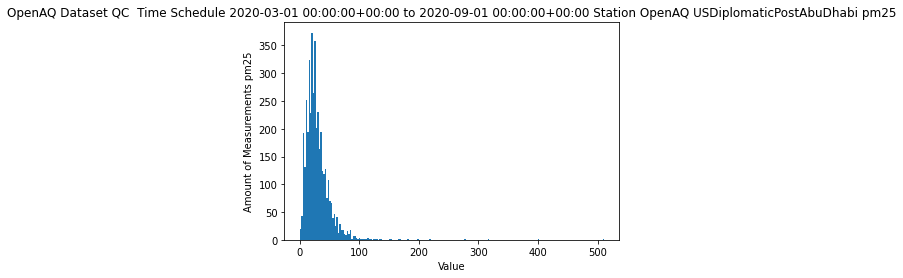

OpenAQ Dataset LinePlot


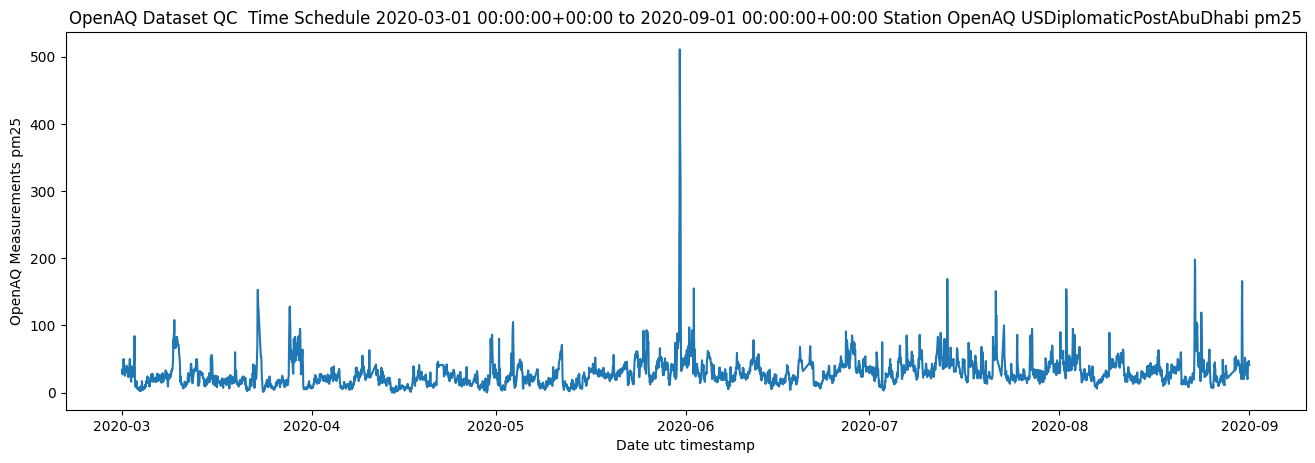

AbuDhabi
Histogram of OpenAQ Dataset from OpenAQ API download


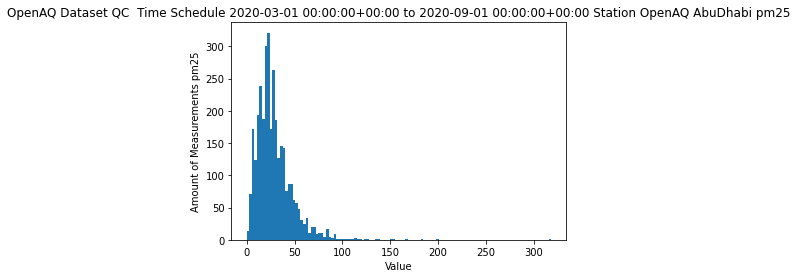

OpenAQ Dataset LinePlot


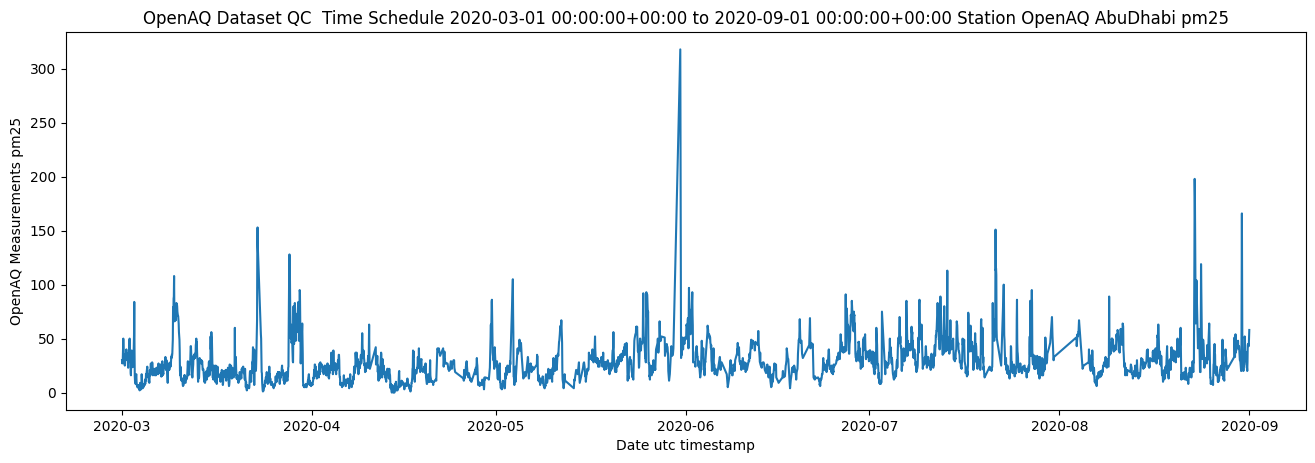

Completed Step 9 
>


In [40]:
#Step 9 Plot OpenAQ Dataset to Line plot and Histogram

print("  STEP 9 ")

print("********")

print("Graph of OpenAQ Dataset Measumrents")

OpenAQ_unit = str(ImportedOpenAQimport['unit'][0]) 

OpenAQDataset_VisualAnalytics = "OpenAQ Dataset QC" + " " + " Time Schedule " + str(dt_begin) + " to " + str(dt_end)

OpenAQDataset_VisualAnalytics_iteration = "OpenAQDataset QC " + " "  + " iteration " + iteration_OpenAQStations

OpenAQDataset = Milestone2_OpenAQ_Dataset_VisualAnalytics_Histogram_Unique(OpenAQAPIdataset, OpenAQStationunique, OpenAQDataset_VisualAnalytics, OpenAQDataset_VisualAnalytics_iteration)

# Milestone3_Get_Imported_OpenAQ_Dataset_parameter_unique_Test(ImportedOpenAQimport,OpenAQDataset, 1,"Test unique parameter")


print("Completed Step 9 ")

print(">")

# Step 10 Completing the Pecos Quality Control 
#
#  1 The Search Criteria are edited in the Method 
#
#  Milestone3_Pecos_Complete_QualityControl_One_OpenAQStation
#
#  2 To incude completeness test to 1
#
#  Edit  QC_CheckDatasetComplete
#
#  3 To use YAML for Search Criteria 
#
#  Change yaml_Yes to 1  
#

In [ ]:
# Step 10 Completing the Pecos Quality Control 
#
#  1 The Search Criteria are edited in the Method 
#
#  Milestone3_Pecos_Complete_QualityControl_One_OpenAQStation
#
#  2 To incude completeness test to 1
#
#  Edit  QC_CheckDatasetComplete
#
#  3 To use YAML for Search Criteria 
#
#  Change yaml_Yes to 1  
#


print("  STEP 10 ")

print("********")

print("Get Pecos Quality Control on OpenAQ dataset")

yaml_Yes = 1

%pip install pyyaml
import yaml


DASHBOARDPATH = f"openaq_dashboard.html"


QC_CheckDatasetComplete = 0 # To incude completeness test - 0 - To include  1 - To not include  

print("OpenAQ Pecos Quality Control Search Criteria: ")



Milestone3_Pecos_Complete_QC_QualityControl_OpenAQStation(ImportedOpenAQimport, OpenAQDataset_VisualAnalytics_iteration, OpenAQStationunique, OpenAQDataset, yaml_Yes)

create_pecos_dashboard(parameter_selection, OpenAQStationunique, DASHBOARDPATH)



print(" **** ")

OpenAQ_QC_Dataset = 0

Milestone3_Get_Imported_OpenAQ_DatasetOutlier(OpenAQ_QC_Dataset)

print(" Results in Monitoring report")

for OpenAQDataset in OpenAQDataset_VisualAnalytics_Results:
    
   print(OpenAQDataset)

print("Completed Step 10")

print(">")

  STEP 10 
********
Get Pecos Quality Control on OpenAQ dataset
Note: you may need to restart the kernel to use updated packages.
OpenAQ Pecos Quality Control Search Criteria: 
US Diplomatic Post: Abu Dhabi
USDiplomaticPostAbuDhabi


/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:9: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  if __name__ == '__main__':
2021-06-08 15:59:03 : Check timestamp


data availabilty:  216 0.951098030337333


2021-06-08 15:59:04 : Check for data outside expected range
2021-06-08 15:59:04 : Check for stagant data and/or abrupt changes using delta (max-min) within a rolling window


*****
Criteria 1 : Timestep 
900
*****
Criteria 2 : Lower Bound and Higher Bound 
Lower Bound 
None
Higher Bound
500
*****
Criteria 3 : Stagnant Measurements 


2021-06-08 15:59:04 : Check for data increment outside expected range
2021-06-08 15:59:04 : Check for outliers


 Measurement that increase by 
10
in Time Schedule
3600
Delta Lower Bound
None
*****
Criteria 4 : Maximum Increment of Measurements 
Increment Increase
10
Increment Decrease
None
*****
Criteria 5: Outlier
UpperBound
300
Time Schedule
3600
*****
OpenAQ Dataset Results 
Mask


2021-06-08 15:59:06 : Creating graphic for value


                     location  parameter  value   unit  country   city  \
2020-03-01 00:00:00      True       True   True   True     True   True   
2020-03-01 00:15:00     False      False  False  False    False  False   
2020-03-01 00:30:00     False      False  False  False    False  False   
2020-03-01 00:45:00     False      False  False  False    False  False   
2020-03-01 01:00:00      True       True   True   True     True   True   
...                       ...        ...    ...    ...      ...    ...   
2020-08-31 23:00:00      True       True   True   True     True   True   
2020-08-31 23:15:00     False      False  False  False    False  False   
2020-08-31 23:30:00     False      False  False  False    False  False   
2020-08-31 23:45:00     False      False  False  False    False  False   
2020-09-01 00:00:00      True       True   True   True     True   True   

                     date.utc  coordinates.latitude  coordinates.longitude  
2020-03-01 00:00:00      True     

2021-06-08 15:59:36 : Writing test results csv file test_resultsOpenAQDataset QC   iteration 1 USDiplomaticPostAbuDhabi pm25 Result.csv
2021-06-08 15:59:36 : Writing HTML report


customOpenAQDataset QC   iteration 1 USDiplomaticPostAbuDhabi pm25.png
     Variable Name          Start Time            End Time Timesteps  \
1                  2020-03-01 00:15:00 2020-03-01 00:45:00         3   
2                  2020-03-01 01:15:00 2020-03-01 01:45:00         3   
3                  2020-03-01 02:15:00 2020-03-01 02:45:00         3   
4                  2020-03-01 03:15:00 2020-03-01 03:45:00         3   
5                  2020-03-01 04:15:00 2020-03-01 04:45:00         3   
...            ...                 ...                 ...       ...   
4587         value 2020-08-29 14:00:00 2020-08-29 15:00:00         5   
4588         value 2020-08-29 18:00:00 2020-08-29 19:00:00         5   
4589         value 2020-08-30 18:00:00 2020-08-30 20:00:00         9   
4590         value 2020-08-31 06:00:00 2020-08-31 07:00:00         5   
4591         value 2020-08-31 18:00:00 2020-08-31 19:00:00         5   

                       Error Flag  
1               Missing time

2021-06-08 15:59:36 : 
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:9: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  if __name__ == '__main__':
2021-06-08 15:59:37 : Check timestamp


Data > upper bound, 500
1
Delta (+) > upper bound, 10
173
Missing timestamp
4416
Nonmonotonic timestamp
1
Abu Dhabi
AbuDhabi
data availabilty:  1117 0.7471134254018564


2021-06-08 15:59:37 : Check for data outside expected range
2021-06-08 15:59:37 : Check for stagant data and/or abrupt changes using delta (max-min) within a rolling window


*****
Criteria 1 : Timestep 
900
*****
Criteria 2 : Lower Bound and Higher Bound 
Lower Bound 
None
Higher Bound
500
*****
Criteria 3 : Stagnant Measurements 


2021-06-08 15:59:38 : Check for data increment outside expected range
2021-06-08 15:59:38 : Check for outliers


 Measurement that increase by 
10
in Time Schedule
3600
Delta Lower Bound
None
*****
Criteria 4 : Maximum Increment of Measurements 
Increment Increase
10
Increment Decrease
None
*****
Criteria 5: Outlier
UpperBound
300
Time Schedule
3600
*****
OpenAQ Dataset Results 
Mask


2021-06-08 15:59:40 : Creating graphic for value


                     location  \
2020-03-01 00:00:00      True   
2020-03-01 00:15:00     False   
2020-03-01 00:30:00     False   
2020-03-01 00:45:00     False   
2020-03-01 01:00:00      True   
...                       ...   
2020-08-31 23:00:00      True   
2020-08-31 23:15:00     False   
2020-08-31 23:30:00     False   
2020-08-31 23:45:00     False   
2020-09-01 00:00:00      True   

                     parameter  value  \
2020-03-01 00:00:00       True   True   
2020-03-01 00:15:00      False  False   
2020-03-01 00:30:00      False  False   
2020-03-01 00:45:00      False  False   
2020-03-01 01:00:00       True   True   
...                        ...    ...   
2020-08-31 23:00:00       True   True   
2020-08-31 23:15:00      False  False   
2020-08-31 23:30:00      False  False   
2020-08-31 23:45:00      False  False   
2020-09-01 00:00:00       True   True   

                      unit  country  \
2020-03-01 00:00:00   True     True   
2020-03-01 00:15:00  False    Fa